<a href="https://colab.research.google.com/github/james-lucius/qureca_ADEQUATE/blob/main/MD_311_03_adiabatic_quantum_computing_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://gitlab.com/qworld/qeducation/educational-materials/adequate-qbook1/raw/main/qworld/images/adq_1.png" align="left" width=450></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

_prepared by Özlem Salehi_

<font size="28px" style="font-size:28px;" align="left"><b>Exercises: Adiabatic Quantum Computing</b></font>


In [1]:
try:
  import qiskit, qiskit_aer
  print("Qiskit has been imported ")
except:
  print("Installing Qiskit...")
  !pip install -U -q qiskit[visualization]
  !pip install -U -q qiskit-aer
  print("Qiskit has been installed")

Installing Qiskit...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.9 MB/s eta 0:00:00
Qiskit has been installed


### Task 1

Compute $U(t,t_0) = exp \left(-iH\cdot(t-t_0)\right)$ for $t_0=0$, $t=\pi$, and $H=Z$ on paper, using the matrix exponentials for Pauli operators.

### Solution

We want to compute $
U(\pi, 0) = \exp\left( -i Z \pi \right).
$

Recall that,
\begin{align}
exp({-i Z t})  = \begin{pmatrix}
                  e^{-it} & 0 \\
                  0 & e^{it}
                  \end{pmatrix} = R_z(2t).
\end{align}

Thus we can write $U(\pi, 0) = R_z(2\pi)$ and $
R_z(2\pi) = \begin{pmatrix}
e^{-i \pi} & 0 \\
0 & e^{i \pi}
\end{pmatrix}
.$

Since $ e^{i \pi} = -1 $ and $ e^{-i \pi} = -1 $, we get

$$
R_z(2\pi) = \begin{pmatrix}
-1 & 0 \\
0 & -1
\end{pmatrix} .
$$

Therefore, the unitary evolution operator is:
$$
\begin{pmatrix}
-1 & 0 \\
0 & -1
\end{pmatrix}.
$$

### Task 2

For $H=Z$, obtain the unitary matrix using Qiskit in three different ways:
- Implement $R_z(\theta)$ with the corresponding angle.
- Use `HamiltonianGate` from Qiskit, which takes as input the Hamiltonian and the duration of the evolution and returns the corresponding unitary.
- Use `PauliEvolutionGate` from Qiskit, which takes as input the Hamiltonian and the duration of the evolution and returns the corresponding unitary.

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from math import pi

qc = QuantumCircuit(1)

#Your code here
qc.rz(2 * pi, 0)

qcOp = Operator.from_circuit(qc)
qcOp.draw('latex')

<IPython.core.display.Latex object>

In [3]:
from qiskit.circuit.library import HamiltonianGate
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit
from math import pi

qc = QuantumCircuit(1)
H = SparsePauliOp(['Z'], coeffs=[1])

### Your code here
qc.append(HamiltonianGate(H, pi), [0])

qcOp = Operator.from_circuit(qc)
qcOp.draw('latex')

<IPython.core.display.Latex object>

In [4]:
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit
from math import pi

qc = QuantumCircuit(1)
op = SparsePauliOp(['Z'], coeffs=[1])

### Your code here
qc.append(PauliEvolutionGate(op, pi), [0])

qcOp = Operator.from_circuit(qc)
qcOp.draw('latex')


<IPython.core.display.Latex object>

### Solution

In [5]:
from qiskit import QuantumCircuit
from math import pi

qc = QuantumCircuit(1)
qc.rz(2*pi,0)
qcOp = Operator.from_circuit(qc)
qcOp.draw('latex')

<IPython.core.display.Latex object>

In [6]:
from qiskit.circuit.library import HamiltonianGate
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit
from math import pi

H = SparsePauliOp(['Z'], coeffs=[1])
qc = QuantumCircuit(1)
qc.append(HamiltonianGate(H, pi),[0])
qcOp = Operator.from_circuit(qc)
qcOp.draw('latex')

<IPython.core.display.Latex object>

In [7]:
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit
from math import pi

qc = QuantumCircuit(1)
op = SparsePauliOp(['Z'], coeffs=[1])
evo = PauliEvolutionGate(op, pi)
qc.append(evo, [0])
print(qc.decompose().draw())
qcOp = Operator.from_circuit(qc)
qcOp.draw('latex')


   ┌────────┐
q: ┤ Rz(2π) ├
   └────────┘


<IPython.core.display.Latex object>

### Task 3

For  $H= X+Z$ , compute $U(t,t_0) = exp \left(-iH\cdot(t-t_0)\right)$ for $t_0=0$ and $t=1$ in Python, using the identity $exp(A) = Pexp(D)P^{-1}$.

In [9]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np
from scipy.linalg import eig
np.set_printoptions(precision=6, suppress=True)

X = np.array([[0, 1], [1, 0]])
Z = np.array([[1 ,0], [0, -1]])
H = X+Z

### Your code here
eigenvalues, eigenvectors = eig(H)
P = eigenvectors
D = np.diag(eigenvalues)
P_inv = np.linalg.inv(P)
expD = np.diag(np.exp(-1j * 1 * np.diagonal(D)))
result = P @ expD @ P_inv
print(result)

[[0.155944-0.698456j 0.      -0.698456j]
 [0.      -0.698456j 0.155944+0.698456j]]


### Solution

In [10]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np
from scipy.linalg import eig
np.set_printoptions(precision=6, suppress=True)

X = np.array([[0, 1], [1, 0]])
Z = np.array([[1 ,0], [0, -1]])
H = X+Z

eigenvalues, eigenvectors = eig(H)
P = eigenvectors
D = np.diag(eigenvalues)
P_inv = np.linalg.inv(P)
expD = np.diag(np.exp(-1j * 1* np.diagonal(D)))
result = P @ expD @ P_inv
print(result)

[[0.155944-0.698456j 0.      -0.698456j]
 [0.      -0.698456j 0.155944+0.698456j]]


### Task 4

For $H=X+Z$, construct the unitary operator using `HamiltonianGate` and `PauliEvolutionGate` from Qiskit. Compare the two results you obtain with the result of the previous task. What can you conclude by looking at the circuits?

In [11]:
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit
from math import pi

qc = QuantumCircuit(1)

### Your code here
op = SparsePauliOp(['X', 'Z'], coeffs = [1, 1])
evo = PauliEvolutionGate(op, 1)
qc.append(evo, [0])

print(qc.decompose().draw())
qcOp = Operator.from_circuit(qc)
qcOp.draw('latex')


   ┌───────┐┌───────┐
q: ┤ Rx(2) ├┤ Rz(2) ├
   └───────┘└───────┘


<IPython.core.display.Latex object>

In [12]:
from qiskit.quantum_info import Operator
from qiskit.circuit.library import HamiltonianGate
from qiskit import QuantumCircuit
from math import pi

qc = QuantumCircuit(1)

# Your code here
op = SparsePauliOp(['X', 'Z'], coeffs = [1, 1])
evo = HamiltonianGate(op, 1)
qc.append(evo, [0])

print(qc.decompose(reps=2).draw())
qcOp = Operator.from_circuit(qc)
qcOp.draw('latex')

global phase: 4.9321
   ┌───────────────────────────┐
q: ┤ U(1.5465,-0.21967,2.9219) ├
   └───────────────────────────┘


<IPython.core.display.Latex object>

### Solution


In [13]:
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit
from math import pi

qc = QuantumCircuit(1)
op = SparsePauliOp(['X', 'Z'], coeffs=[1, 1])
evo = PauliEvolutionGate(op,1)
qc.append(evo, [0])
print(qc.decompose().draw())
qcOp = Operator.from_circuit(qc)
qcOp.draw('latex')


   ┌───────┐┌───────┐
q: ┤ Rx(2) ├┤ Rz(2) ├
   └───────┘└───────┘


<IPython.core.display.Latex object>

In [14]:
from qiskit.quantum_info import Operator
from qiskit.circuit.library import HamiltonianGate
from qiskit import QuantumCircuit
from math import pi

qc = QuantumCircuit(1)
op = SparsePauliOp(['X', 'Z'], coeffs=[1, 1])
qc.append(HamiltonianGate(op, 1),[0])
print(qc.decompose(reps=2).draw())
qcOp = Operator.from_circuit(qc)
qcOp.draw('latex')

global phase: 4.9321
   ┌───────────────────────────┐
q: ┤ U(1.5465,-0.21967,2.9219) ├
   └───────────────────────────┘


<IPython.core.display.Latex object>

If we check the quantum circuit from the first code, we see that $R_X$ and $R_Z$ gates are implemented consecutively. Implemented unitary corresponds to $exp(-iX)exp(-iZ)$. The reason is that `PauliEvolutionGate`is implemented using Lie-Trotter product formula with a single repetition $n=1$:

$$\exp(A+B) = \lim_{n → \infty} \left (exp\left (\frac{A}{n} \right )exp\left (\frac{B}{n} \right ) \right)^n.$$

Hence, $exp(-i(X+Z))$ is implemented as $exp(-iX)exp(-iZ)$.

The second code implements the circuit exactly, which can be verified by Task 1.

Note that `HamiltonianGate` is also not exact for more than 2 qubits.

### Task 5

For $H_i = XII + IXI + IIX$ and $H_f = XZX+YZY+ZZZ$, plot the eigenvalues of the Hamiltonian  $H(t) = (1-t/T)H_i + (t/T)H_f$ for starting from $t=0$ to $t=T=50$. For each eigenvalue, use a different color.

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


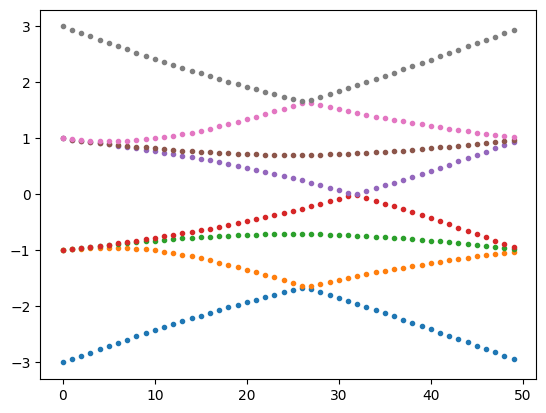

In [15]:
from qiskit.quantum_info import SparsePauliOp
import scipy
import matplotlib.pyplot as plt

# Define the Hamiltonians
T=50
Hi = SparsePauliOp(["XII", "IXI", "IIX"], [1, 1, 1])
Hf = SparsePauliOp(["XZX", "YZY", "ZZZ"], [1, 1, 1])

for t in range(T):
  # Compute H_t and its eigenvalues
  Ht = (1 - t / T) * Hi + t / T * Hf
  eigenvalues, _ = scipy.linalg.eig(Ht.to_matrix())


  for i in range(len(eigenvalues)):
    color = plt.cm.tab10(i)
    # Add the value of each eigenvalue at time t to the plot
    plt.scatter(t, sorted(eigenvalues)[i], color = color, marker = ".")



### Solution

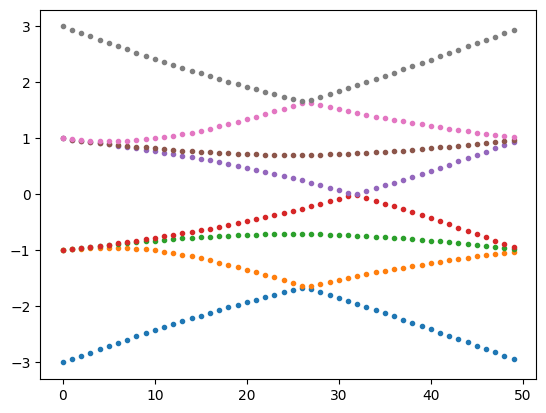

In [16]:
from qiskit.quantum_info import SparsePauliOp
import scipy
import matplotlib.pyplot as plt

# Define the Hamiltonians
Hi =  SparsePauliOp(["XII","IXI","IIX"], [1,1,1])
Hf =  SparsePauliOp(["XZX","YZY","ZZZ"], [1,1,1])
T=50

for t in range(T):
  # Find H_t and its eigenvalues
  Ht = (1-t/T)*Hi + t/T*Hf
  eigenvalues, _ = scipy.linalg.eig(Ht.to_matrix())
  for i in range(len(eigenvalues)):
    color = plt.cm.tab10(i)
    # Add the value of each eigenvalue at time t to the plot
    plt.scatter(t, sorted(eigenvalues)[i], color = color, marker = ".")



